In [ ]:
import pandas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset = pandas.read_excel("/content/most final - Copy.xlsx",index_col='S.NO.')


In [ ]:
dataset


,R_DATA
S.NO.,
1901/01,62.6
1901/02,31.3
1901/03,8.2
1901/04,1.1
1901/05,13.6
...,...
2019/08,6.6
2019/09,6.6
2019/10,6.6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 1901/01 to 2019/12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_DATA  1428 non-null   float64
dtypes: float64(1)
memory usage: 22.3+ KB


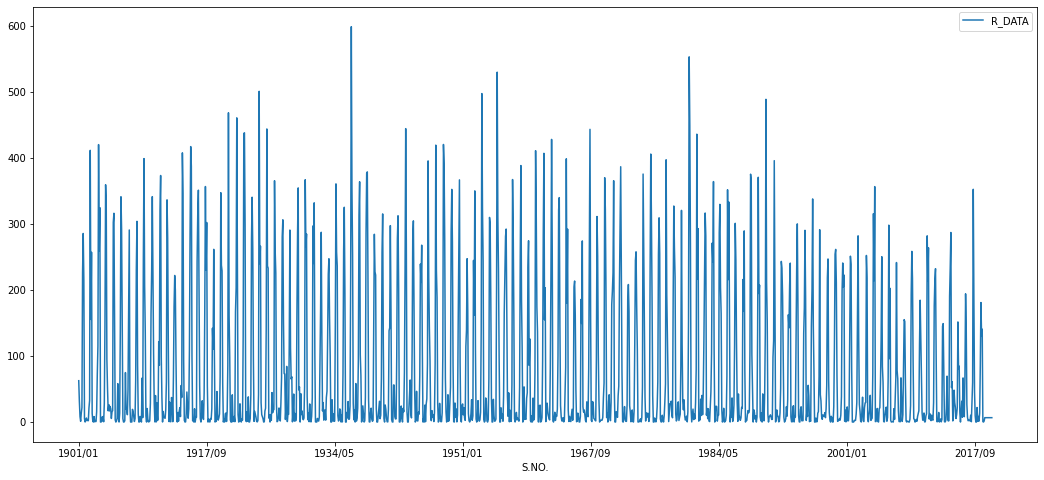

In [ ]:
dataset.plot(figsize=(18,8))

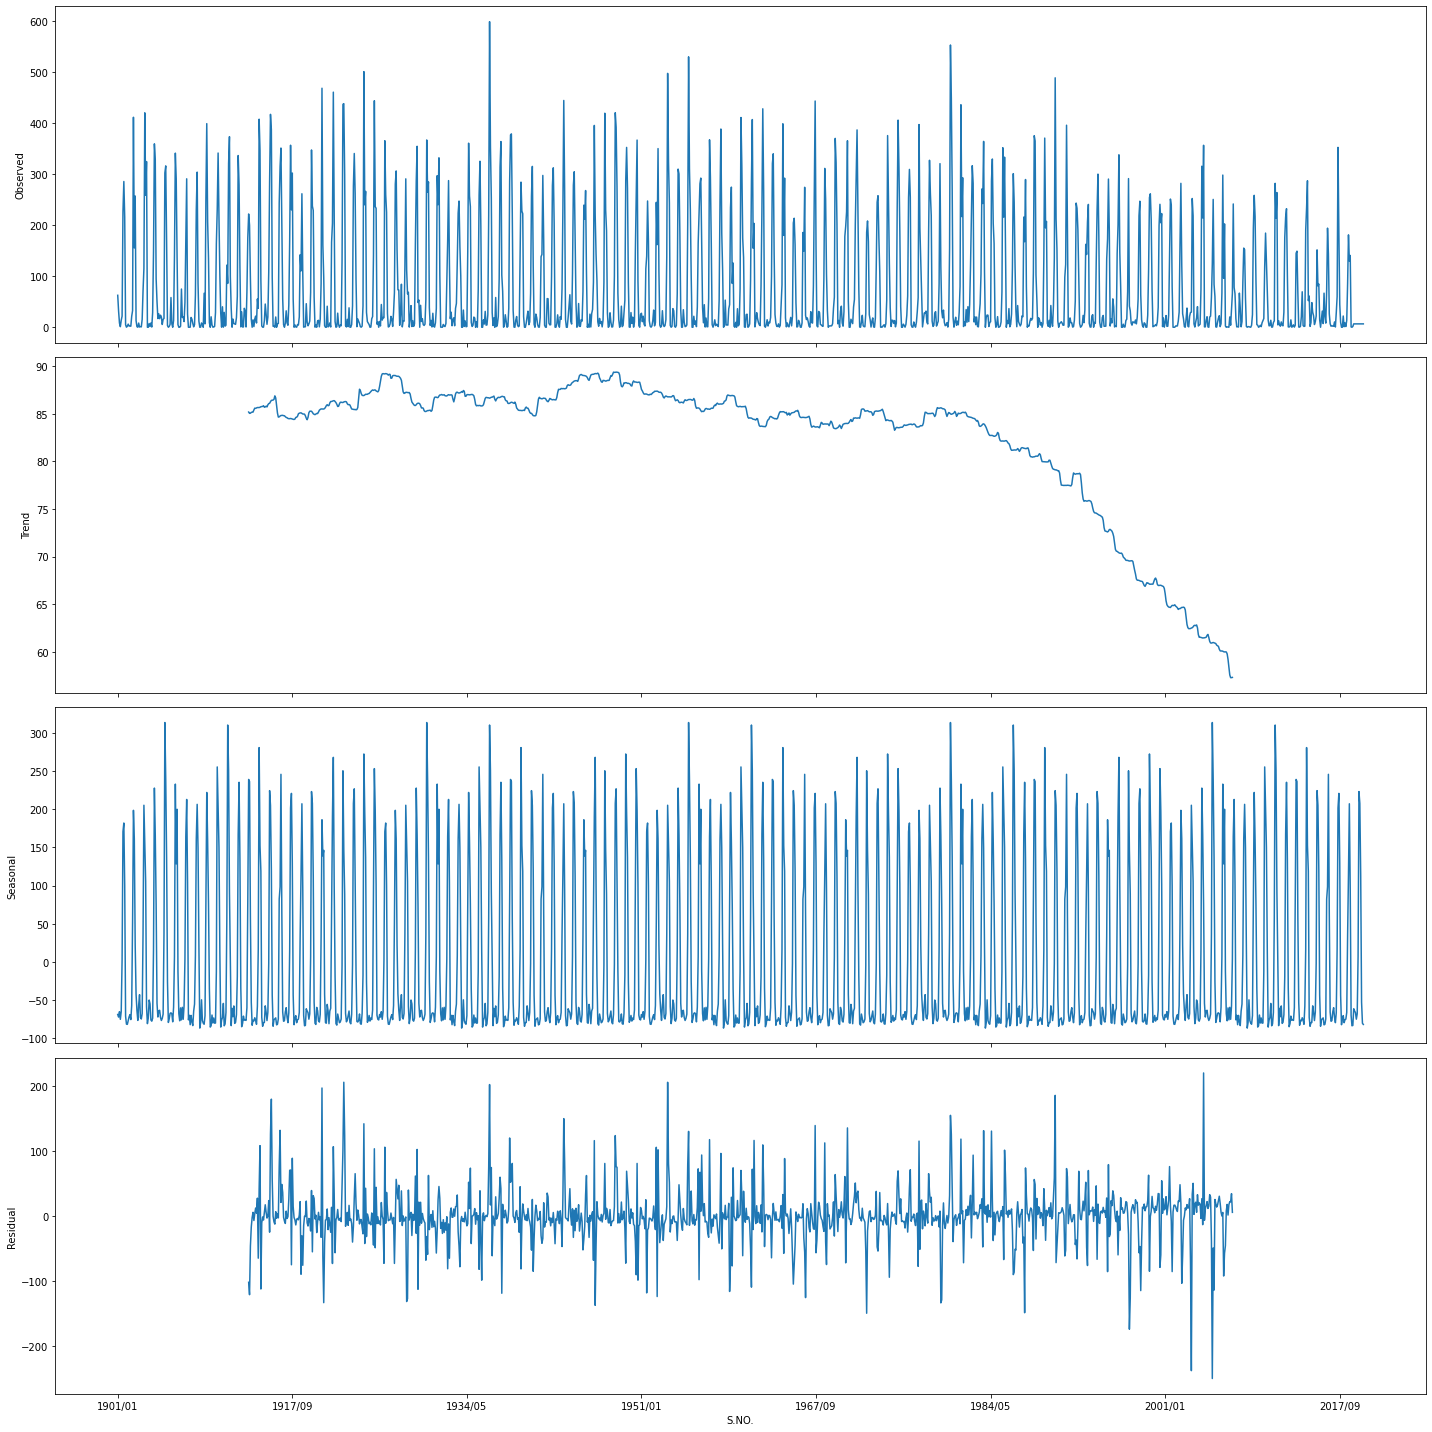

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=20,20
result=seasonal_decompose(dataset['R_DATA'],model='additive',freq=300)
result.plot()
plt.show()


In [ ]:
len(dataset)

1428

In [ ]:
train=dataset.iloc[:1200]
test=dataset.iloc[1200:]

In [ ]:
dataset.head(),dataset.tail()

(         R_DATA
 S.NO.          
 1901/01    62.6
 1901/02    31.3
 1901/03     8.2
 1901/04     1.1
 1901/05    13.6,          R_DATA
 S.NO.          
 2019/08     6.6
 2019/09     6.6
 2019/10     6.6
 2019/11     6.6
 2019/12     6.6)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [ ]:
scaler.fit(train,test)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
scaled_train[:13]

array([[1.04542418e-01],
       [5.22712091e-02],
       [1.36940548e-02],
       [1.83700735e-03],
       [2.27120908e-02],
       [3.64061456e-02],
       [3.78256513e-01],
       [4.76953908e-01],
       [3.59719439e-01],
       [8.18303273e-03],
       [1.67000668e-04],
       [3.50701403e-03],
       [1.01870407e-02]])

In [ ]:

from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)



In [ ]:
x,y=generator[0]
print(f'given the array :\n{x.flatten()}')
print(f'predict this y:\n{y}')
x.shape

given the array :
[1.04542418e-01 5.22712091e-02 1.36940548e-02 1.83700735e-03
 2.27120908e-02 3.64061456e-02 3.78256513e-01 4.76953908e-01
 3.59719439e-01 8.18303273e-03 1.67000668e-04 3.50701403e-03]
predict this y:
[[0.01018704]]


(1, 12, 1)

In [ ]:

n_input = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)



In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=1000)

Epoch 1/1000
1188/1188 [==============================] - 9s 7ms/step - loss: 0.0212
Epoch 2/1000
1188/1188 [==============================] - 8s 6ms/step - loss: 0.0122
Epoch 3/1000
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0108
Epoch 4/1000
1188/1188 [==============================] - 8s 6ms/step - loss: 0.0105
Epoch 5/1000
1188/1188 [==============================] - 10s 8ms/step - loss: 0.0103
Epoch 6/1000
1188/1188 [==============================] - 9s 7ms/step - loss: 0.0103
Epoch 7/1000
1188/1188 [==============================] - 8s 6ms/step - loss: 0.0099
Epoch 8/1000
1188/1188 [==============================] - 8s 7ms/step - loss: 0.0094
Epoch 9/1000
1188/1188 [==============================] - 11s 9ms/step - loss: 0.0093
Epoch 10/1000
1188/1188 [==============================] - 8s 6ms/step - loss: 0.0096
Epoch 11/1000
1188/1188 [==============================] - 8s 7ms/step - loss: 0.0093
Epoch 12/1000
1188/1188 [==============================] - 

In [ ]:
# loss_per_epoch=model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

array([[-0.01563911]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.01469606])

In [ ]:

test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input, n_features))
for i in range(len(test)):
    current_pred= model.predict(current_batch)[0]

    test_predictions.append(current_pred)
    current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
test.head()

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
test['Predection'] = true_predictions

In [ ]:
test.plot(figsize=(24,6))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['R_DATA'],test['Predection']))
print(rmse)

In [ ]:
test


In [ ]:
test.tail()